# **MedCare Wellness Research Center Project**


## EDA

Performing Exploratory data analysis (EDA). Understanding data from statistical point of few, with visualizations


Importing needed Libraries for the project:

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

Introducing a variable which reads the database:

In [ ]:

medcenter_df = pd.read_csv(r"medcenter.csv")

Checking the structure of database:


In [ ]:

medcenter_df.head()

,Walking Difficulty,Torsades de Pointes,Skin Cancer,Hours of sleep,How do you Feel,Asthma?,Exercise?,Gender,Kidney Disease,Is Smoking,Ethnicity,Diabetes,Drinks per Week,Age Group,Mental Health,BMI,Physical Health,History of Stroke,Patient ID
0,Y,Y,N,10,Good,N,Y,F,N,Y,White,N,N,80 or older,0,15.55,7,Y,100074
1,N,Y,N,7,Fair,Y,N,F,N,N,White,Y,N,65-69,0,38.62,2,N,100086
2,N,Y,N,7,Good,N,N,M,N,N,White,N,N,60-64,0,21.62,3,N,100094
3,Y,Y,N,8,Good,N,N,F,N,Y,White,N,N,65-69,0,22.14,0,N,100154
4,Y,Y,N,8,Fair,N,Y,M,Y,N,White,Y,N,70-74,0,43.05,0,N,100158


Checking the features of database:

In [ ]:

medcenter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261311 entries, 0 to 261310
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Walking Difficulty   261311 non-null  object 
 1   Torsades de Pointes  261311 non-null  object 
 2   Skin Cancer          261311 non-null  object 
 3   Hours of sleep       261311 non-null  int64  
 4   How do you Feel      261311 non-null  object 
 5   Asthma?              261311 non-null  object 
 6   Exercise?            261311 non-null  object 
 7   Gender               261311 non-null  object 
 8   Kidney Disease       261311 non-null  object 
 9   Is Smoking           261311 non-null  object 
 10  Ethnicity            261311 non-null  object 
 11  Diabetes             261311 non-null  object 
 12  Drinks per Week      261311 non-null  object 
 13  Age Group            261311 non-null  object 
 14  Mental Health        261311 non-null  int64  
 15  BMI              

Performing NaN count to see missing values:

In [ ]:

nan_count = medcenter_df.isna().sum()
print("Rows:",medcenter_df.shape[0])
print("NaN count in each column:")
print(nan_count)

Rows: 261311
NaN count in each column:
Walking Difficulty     0
Torsades de Pointes    0
Skin Cancer            0
Hours of sleep         0
How do you Feel        0
Asthma?                0
Exercise?              0
Gender                 0
Kidney Disease         0
Is Smoking             0
Ethnicity              0
Diabetes               0
Drinks per Week        0
Age Group              0
Mental Health          0
BMI                    0
Physical Health        0
History of Stroke      0
Patient ID             0
dtype: int64


Checking how many options are in each variable:

In [ ]:

medcenter_df.nunique()

Walking Difficulty          2
Torsades de Pointes         2
Skin Cancer                 2
Hours of sleep             24
How do you Feel             5
Asthma?                     2
Exercise?                   2
Gender                      2
Kidney Disease              2
Is Smoking                  2
Ethnicity                   6
Diabetes                    4
Drinks per Week             2
Age Group                  13
Mental Health              31
BMI                      3445
Physical Health            31
History of Stroke           2
Patient ID             261311
dtype: int64

Checking which variables are numerical and which categorical:

In [ ]:

cat_cols=medcenter_df.select_dtypes(include=['object']).columns
num_cols = medcenter_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer',
       'How do you Feel', 'Asthma?', 'Exercise?', 'Gender', 'Kidney Disease',
       'Is Smoking', 'Ethnicity', 'Diabetes', 'Drinks per Week', 'Age Group',
       'History of Stroke'],
      dtype='object')
Numerical Variables:
['Hours of sleep', 'Mental Health', 'BMI', 'Physical Health', 'Patient ID']


Performing basic statistics for numercial varables:

In [ ]:

medcenter_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours of sleep,261311.0,7.099406,1.446752,1.00,6.00,7.00,8.00,24.00
Mental Health,261311.0,3.907199,7.969255,0.00,0.00,0.00,3.00,30.00
BMI,261311.0,28.355734,6.361975,12.02,24.03,27.35,31.47,94.85
Physical Health,261311.0,3.474951,8.079793,0.00,0.00,0.00,2.00,30.00
Patient ID,261311.0,549563.630153,259779.193866,100006.00,324810.50,549753.00,774317.50,999997.00


Plotting histograms and boxplots of numerical variables to get more info on data distribution:

Hours of sleep


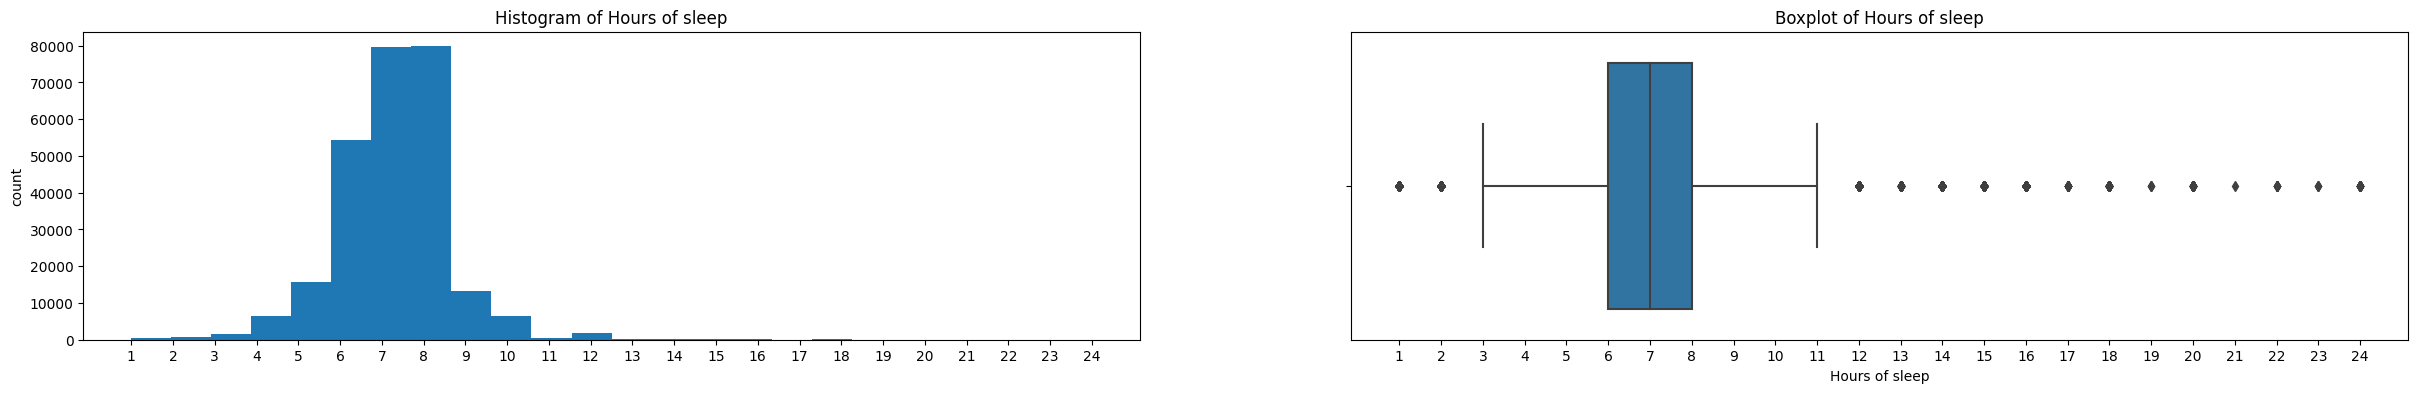

Mental Health


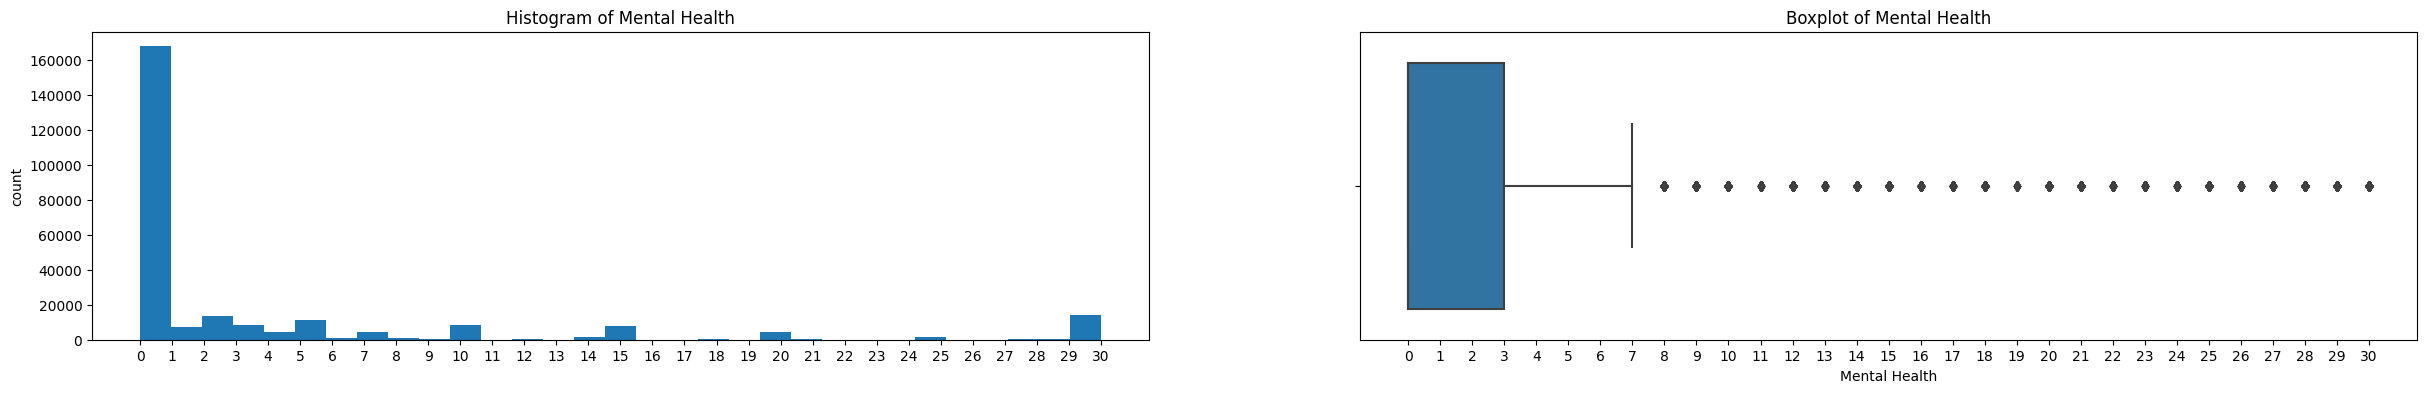

BMI


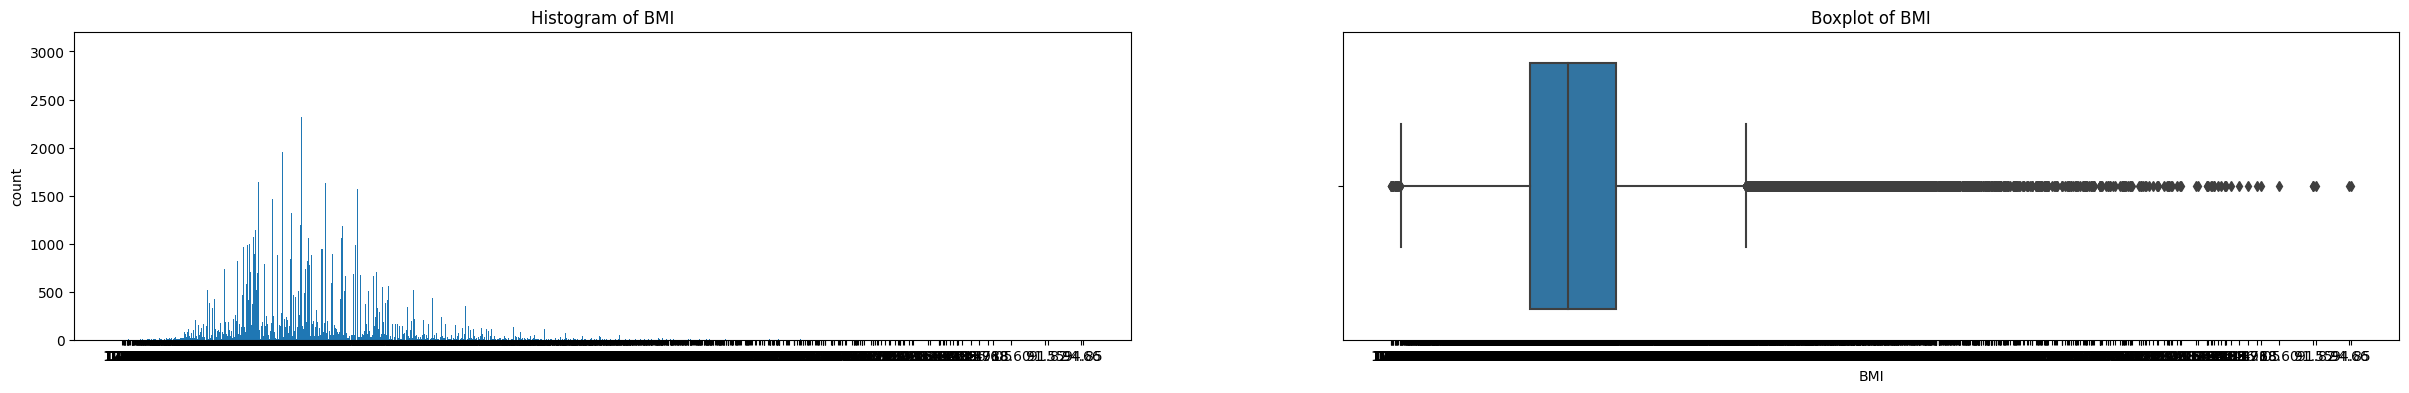

Physical Health


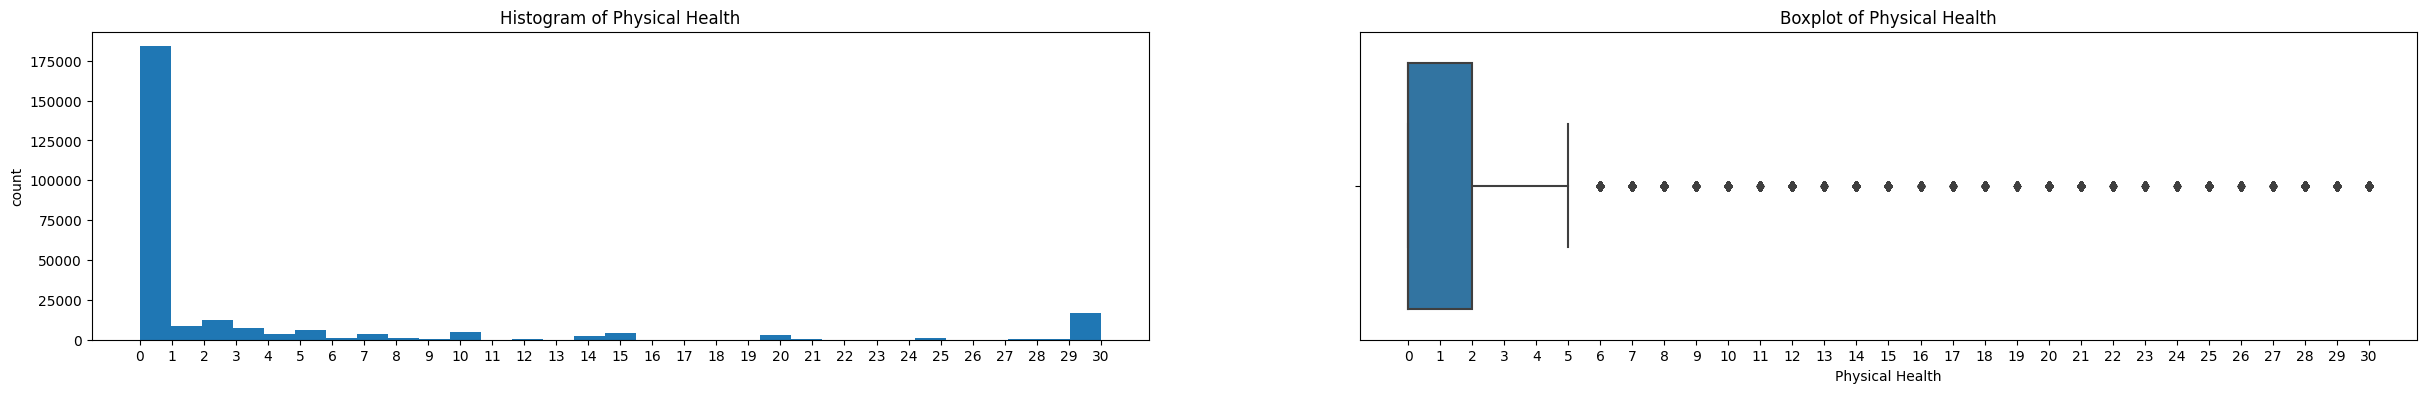

In [ ]:


# Creating a list to avoid Patient ID
cols = ['Hours of sleep', 'Mental Health', 'BMI', 'Physical Health']

# Using for loop to iterate through numerical columns
for col in cols:
    print(col)
    plt.figure(figsize=(30, 4))

    # Getting unique values for each column and sorting them
    unique_values = medcenter_df[col].unique()
    unique_values.sort()

    # Histogram subplot
    plt.subplot(1, 2, 1)
    medcenter_df[col].hist(grid=False, bins=len(unique_values))  # Setting bins for unique values
    plt.ylabel('count')
    plt.title(f'Histogram of {col}')
    plt.xticks(unique_values)  # Setting ticks on X axis for unique values

    # Boxplot subplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=medcenter_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(unique_values)  # Setting ticks on X axis for unique values


    plt.show()


Poltting countplots to see trends in current data without BMI (too much individual data):

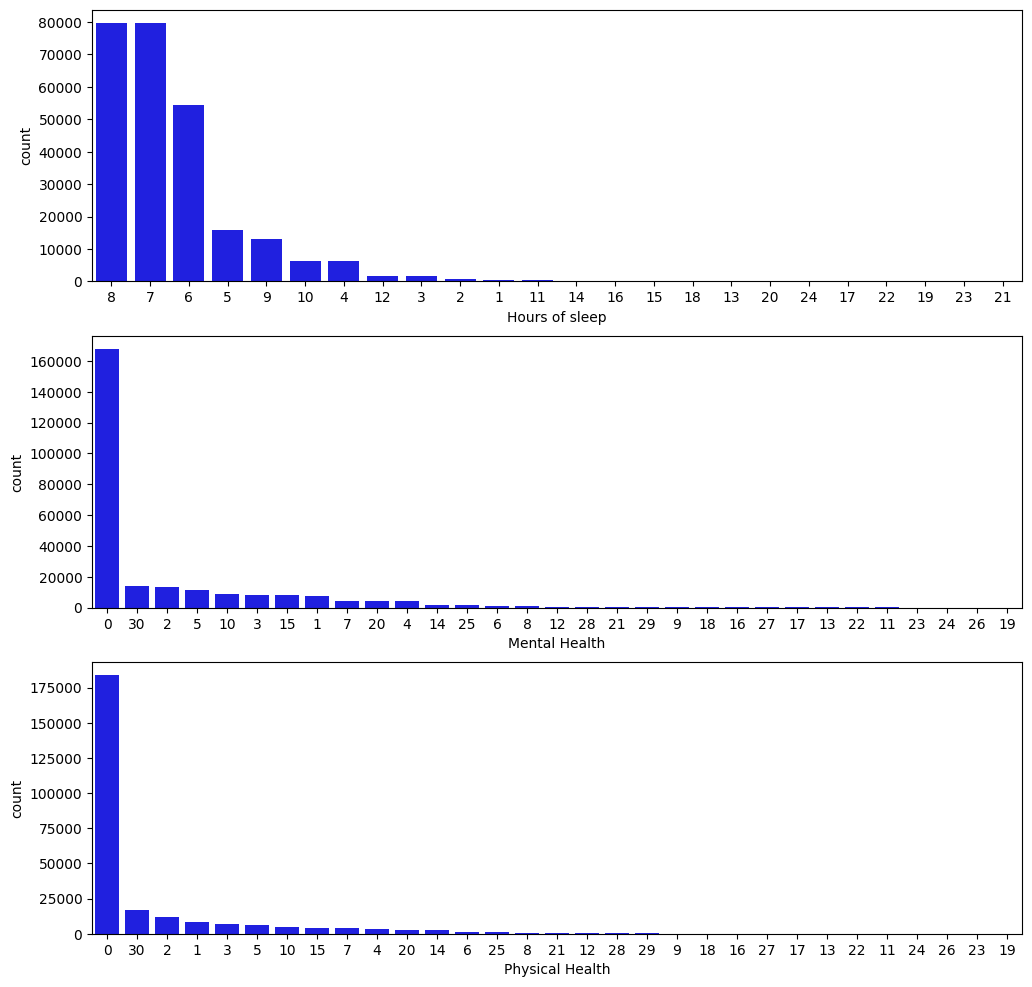

In [ ]:

fig, axes = plt.subplots(3, 1, figsize = (12, 12))
sns.countplot(ax = axes[0], x = 'Hours of sleep', data = medcenter_df, color = 'blue',
              order = medcenter_df['Hours of sleep'].value_counts().index);
sns.countplot(ax = axes[1], x = 'Mental Health', data = medcenter_df, color = 'blue',
              order = medcenter_df['Mental Health'].value_counts().index);
sns.countplot(ax = axes[2], x = 'Physical Health', data = medcenter_df, color = 'blue',
              order = medcenter_df['Physical Health'].value_counts().index);

Generating the correlation matrix to find possible allignments in data:

<ipython-input-11-4d809469d661>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = medcenter_df.corr()


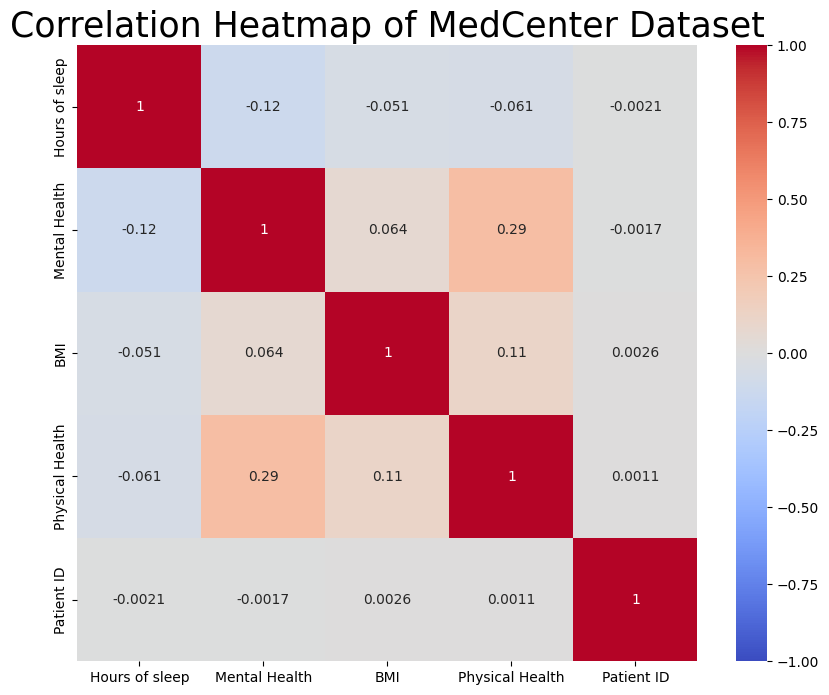

In [ ]:

correlation_matrix = medcenter_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of MedCenter Dataset", fontsize=25)

plt.show()

Plotting the relation of distribution between most correlated features:

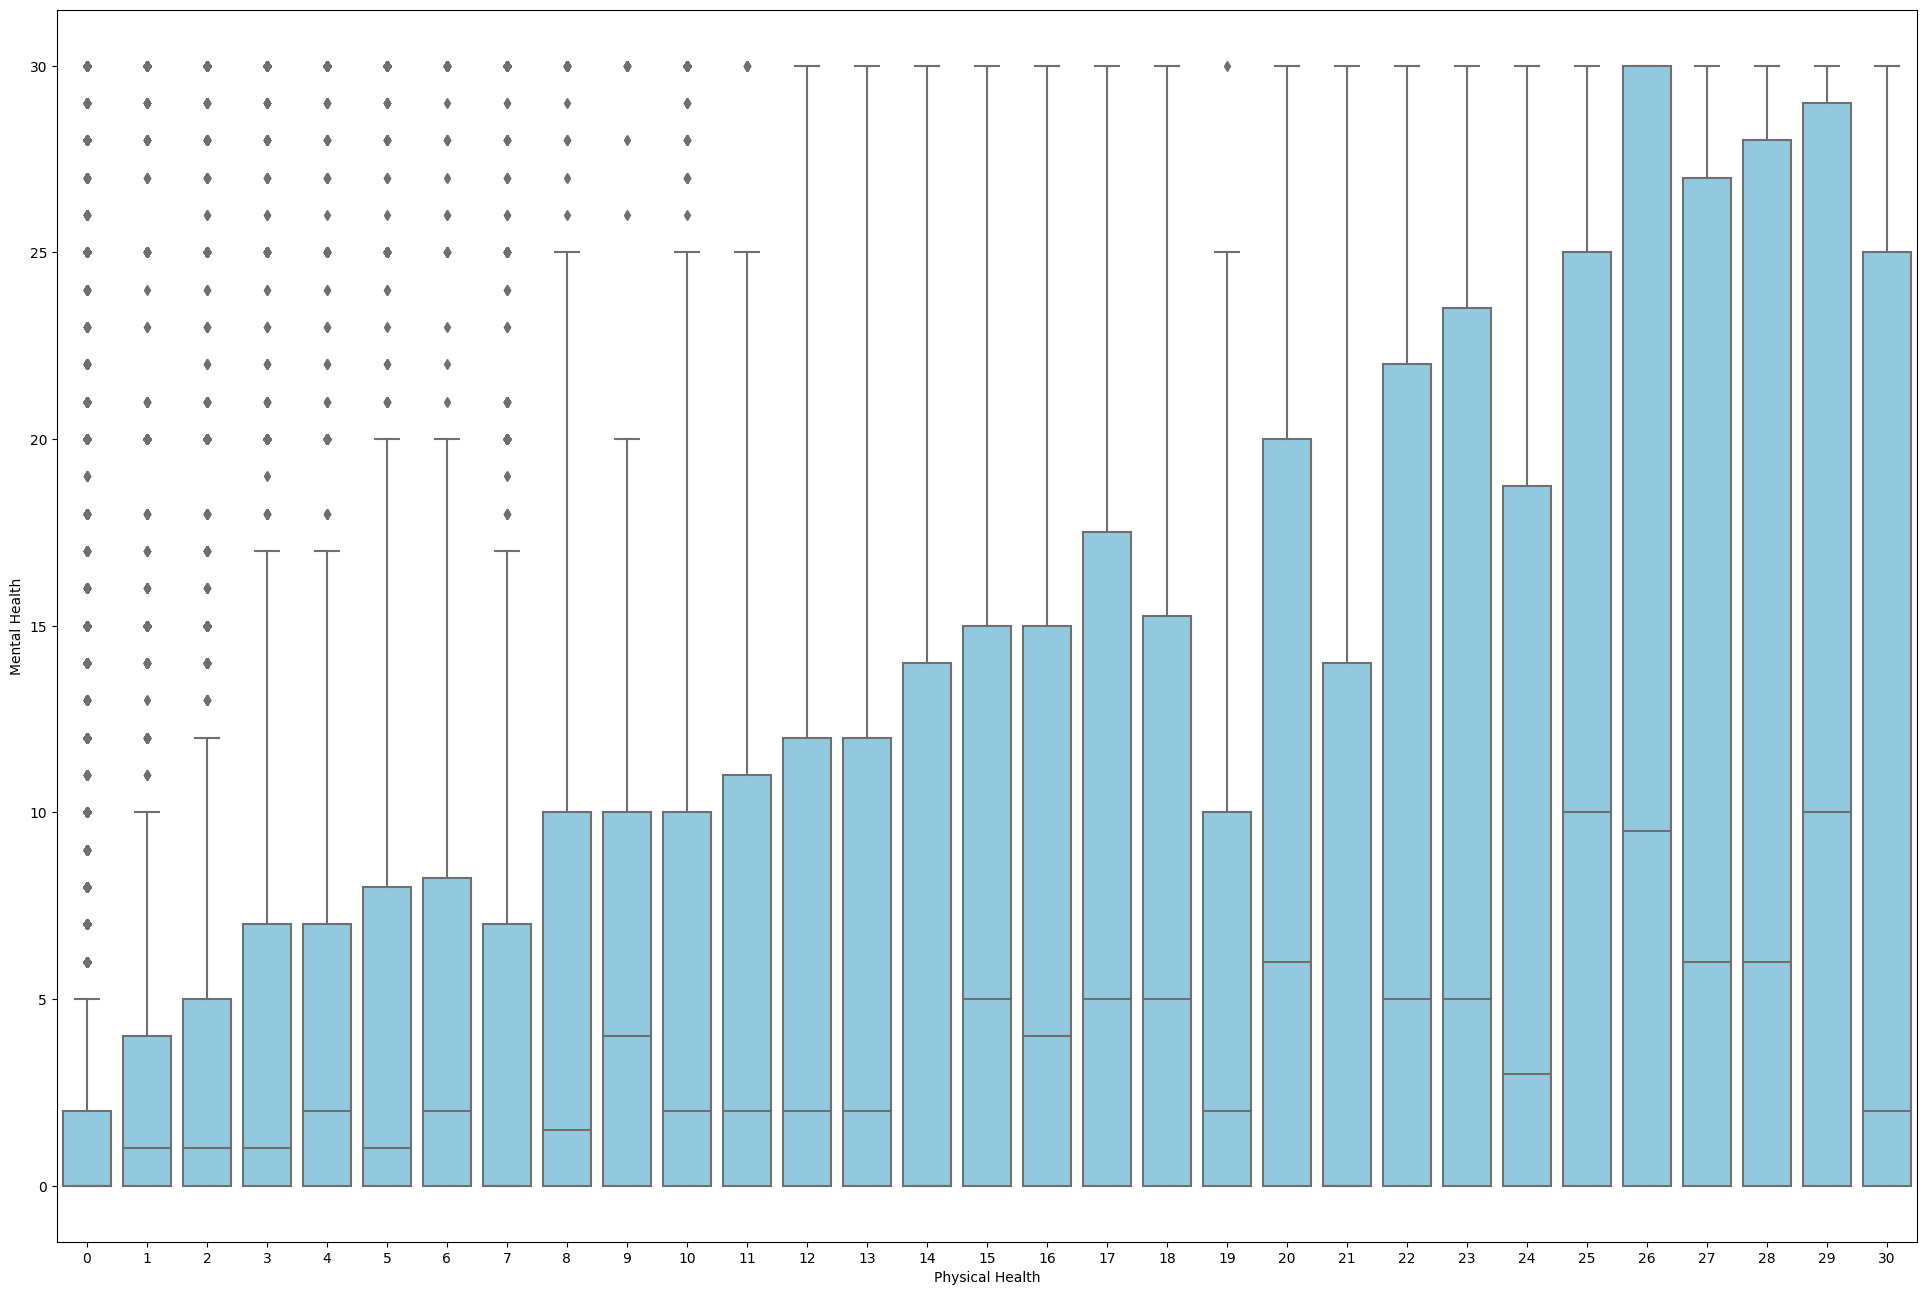

In [ ]:

plt.figure(figsize=(24,16))
sns.boxplot(data=medcenter_df, x="Physical Health", y="Mental Health", color="skyblue")
plt.show()

NOTES FROM THIS SECTION

1. Physical Health is heavily skewed to the right, therefore the 0 values, which indicate a perfect condition, should be checked for labeling, whether it is homogenous or missing data was incorrectly labeld as 0
2. There are many possible outliers affecting data with their insignificance
3. There is a very low correlation siginicance overall of all the values
4. The only two worth considering is Physical Health with Mental Health
5. One hot encoding must be done to consider more values in the correllation matrix

## Adjusting the data
Using tools to do one hot encoding, dropping unnecessary values and insignificant columns

In [ ]:
## Adjusting features with OHE

# Appling one-hot encoding using get_dummies
list = ['Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer','Asthma?',
        'Exercise?', 'Kidney Disease', 'Is Smoking', 'Drinks per Week',
        'History of Stroke']

# Using for loop to change outcome to binary to perform operations
for i in list:
  medcenter_df[i].replace({'Y': 1, 'N': 0}, inplace=True)

encoded_df = pd.get_dummies(medcenter_df, columns=['How do you Feel', 'Gender', 'Ethnicity', 'Age Group', 'Diabetes'])

# Saving the encoded dataframe to original dataframe
medcenter_df = encoded_df

Managing the Diabetes columns after OHE, driven by logical assumptions about dataset:

In [ ]:


# Assigning 'Yes' if 'Diabetes_Y' or 'Diabetes_Yes (during pregnancy)' or 'Diabetes_No, borderline diabetes' is 1
medcenter_df.loc[medcenter_df['Diabetes_Y'] == 1, 'Diabetes_Status'] = 1
medcenter_df.loc[medcenter_df['Diabetes_Yes (during pregnancy)'] == 1, 'Diabetes_Status'] = 1
medcenter_df.loc[medcenter_df['Diabetes_No, borderline diabetes'] == 1, 'Diabetes_Status'] = 1

# Assigning 'No' if 'Diabetes_N' is 1
medcenter_df.loc[medcenter_df['Diabetes_N'] == 1, 'Diabetes_Status'] = 0

# Droping the old diabetes columns
medcenter_df.drop(columns=['Diabetes_Y', 'Diabetes_N', 'Diabetes_Yes (during pregnancy)', 'Diabetes_No, borderline diabetes'], inplace=True)

Deleting outliers (classic IQR method of deleting outliers):

In [ ]:

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - IQR # Setting to "1 *" because of assesment based on mathematical calculations of columns
        upper_bound = Q3 + IQR

    # Filtering out the outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

list = ['BMI', 'Hours of sleep'] # Only this numerical features have illogical entries, therefore outliers

# Adjusting the dataset
medcenter_df = remove_outliers(medcenter_df, list)

Generating the correlation matrix to visualize the data after basic adjustments:

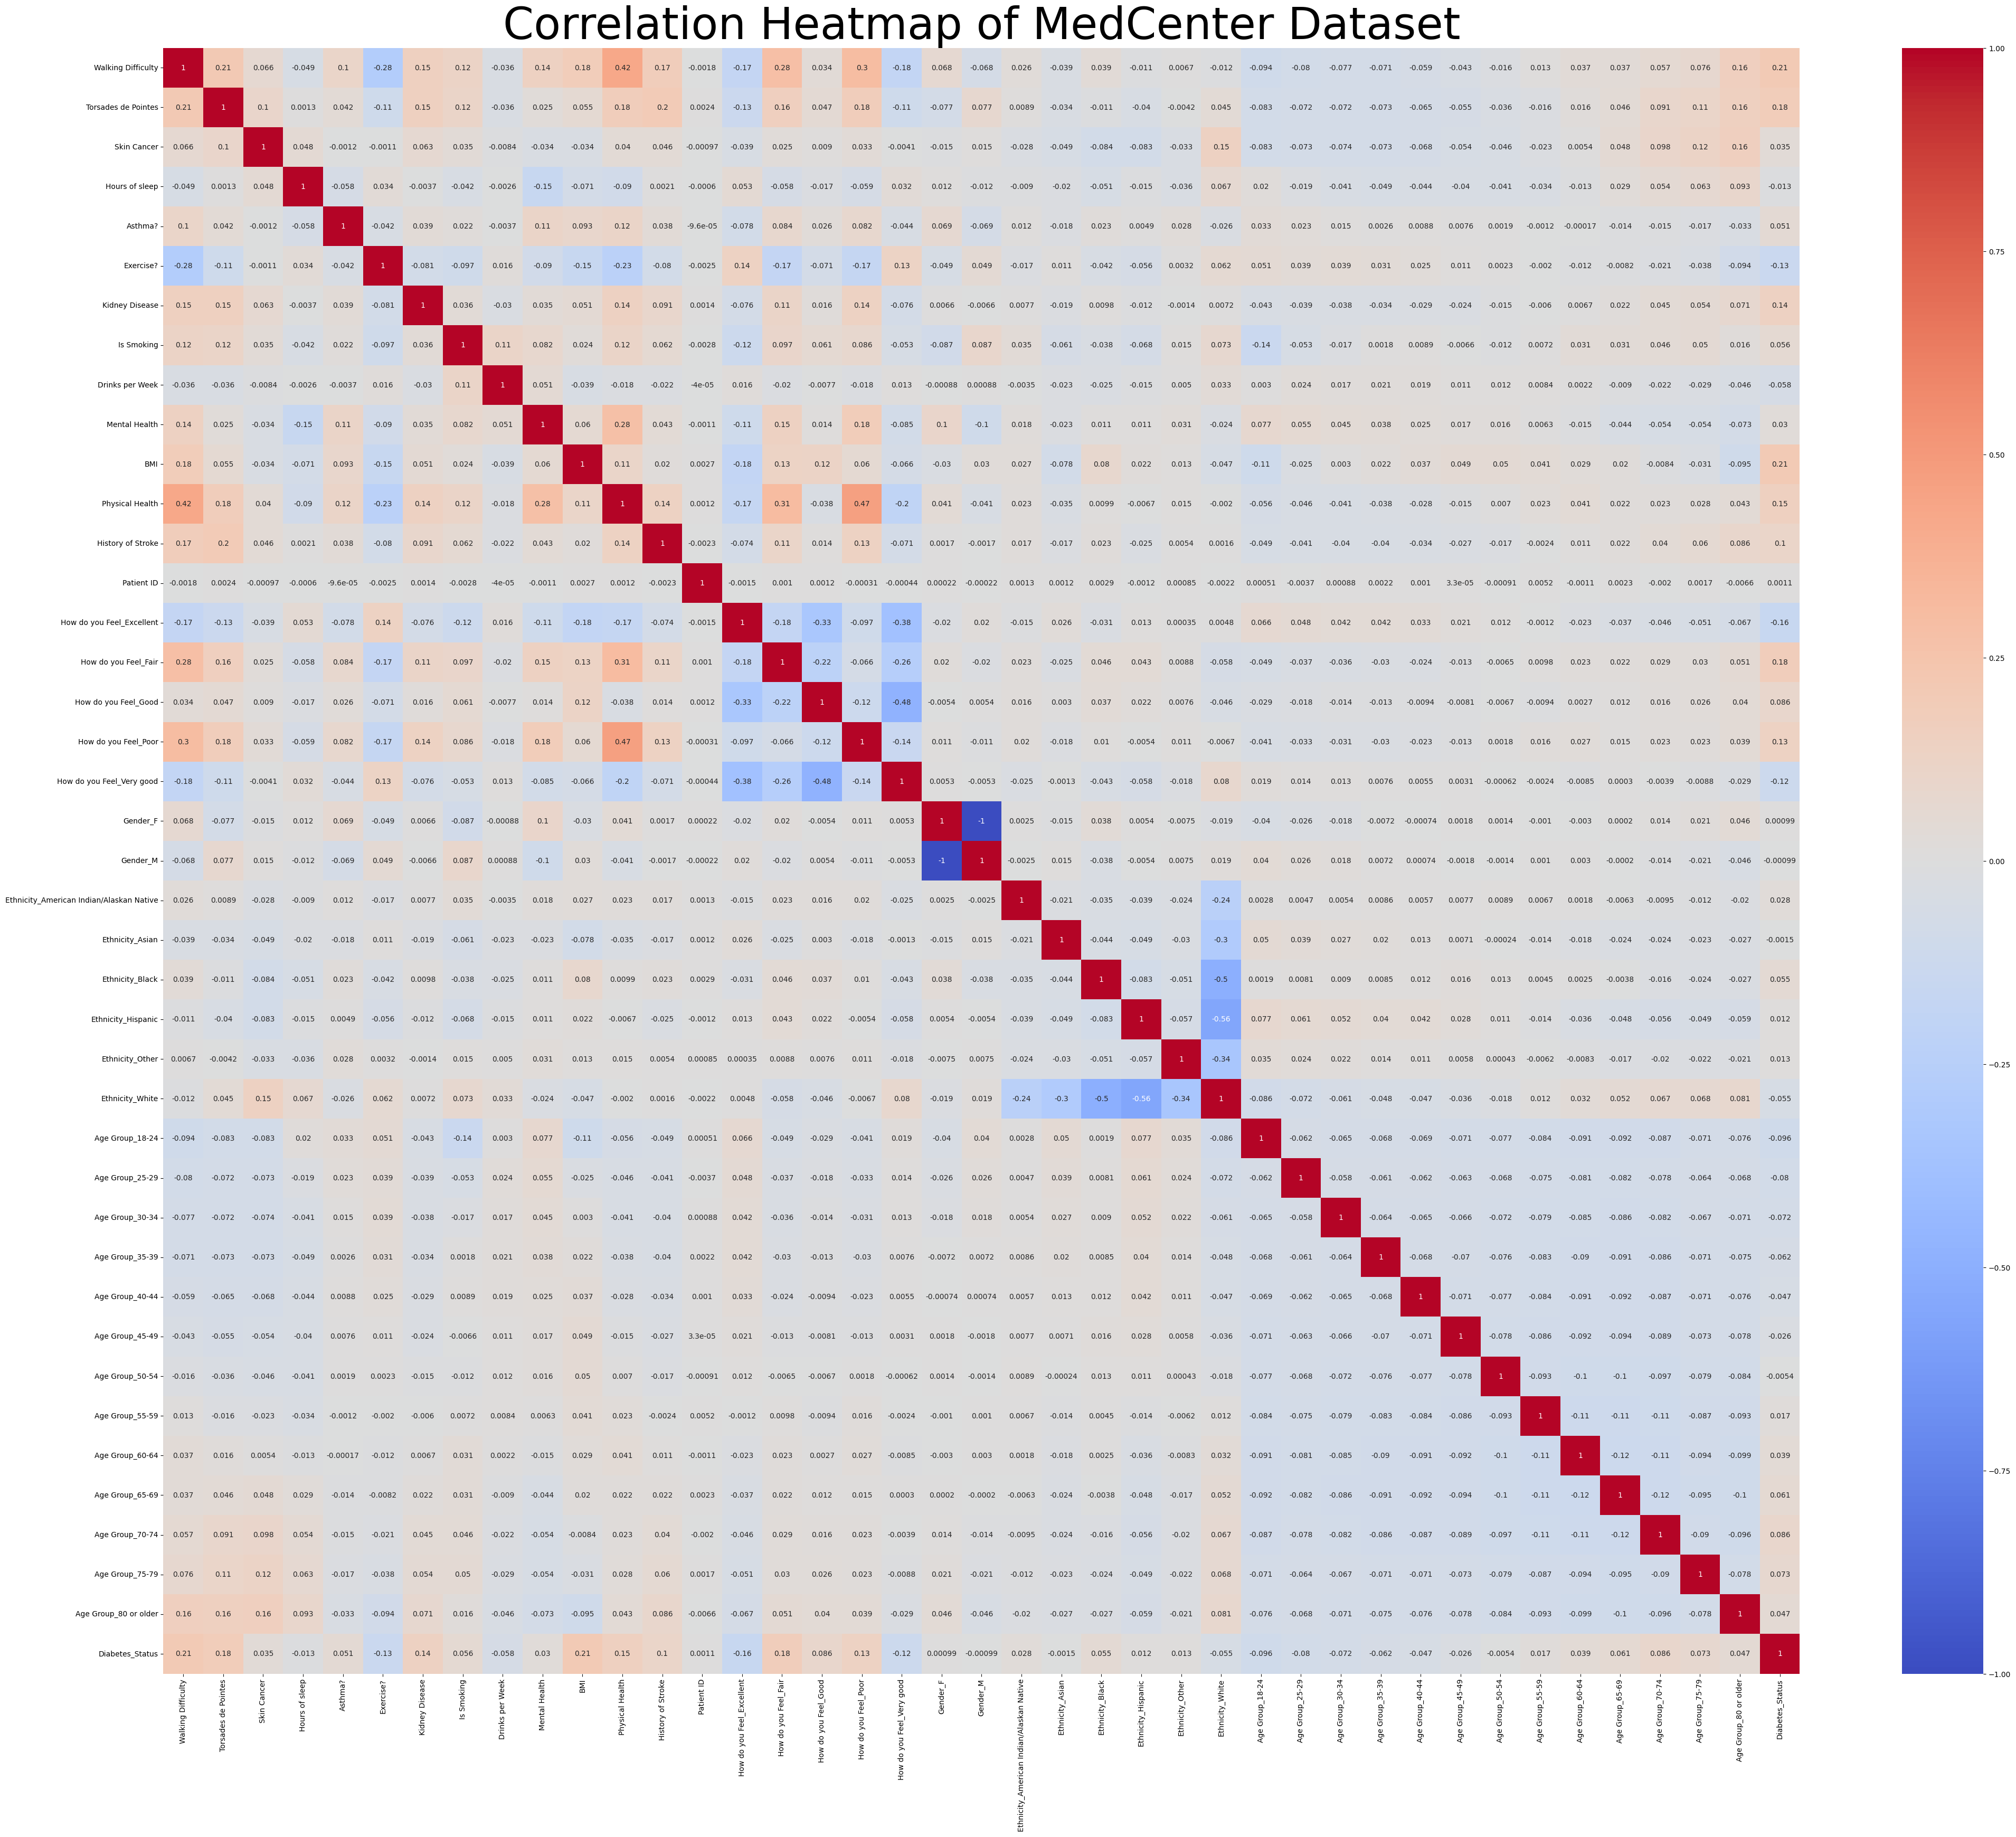

In [ ]:

correlation_matrix = medcenter_df.corr()
plt.figure(figsize=(10*5, 8*5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of MedCenter Dataset", fontsize=60)

plt.show()

Visualising how many illogical entries connected to Physical Health there are - sick or with not healthy indicators and in perfect health:

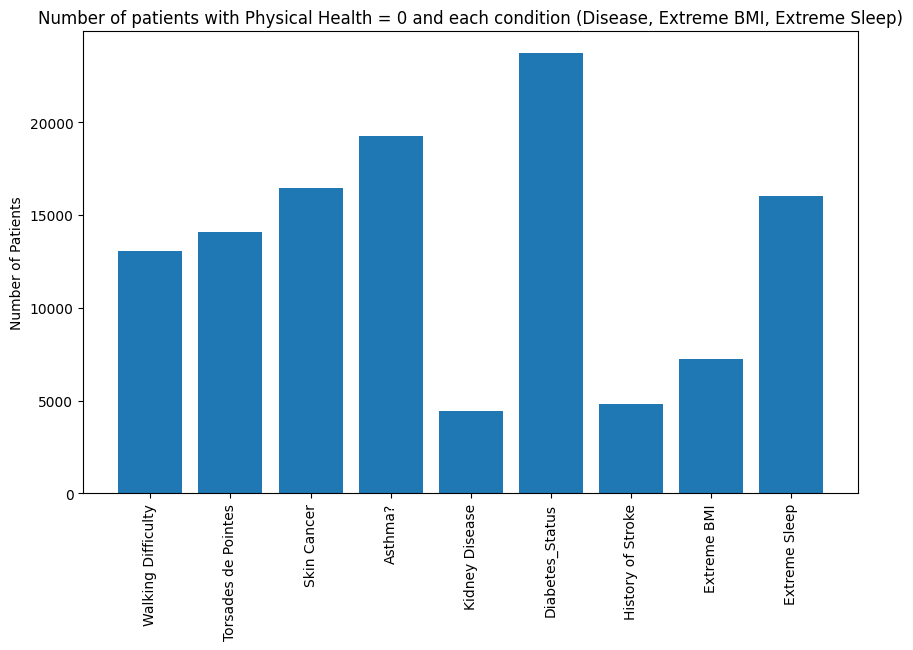

In [ ]:


# List of conditions (including diseases and extreme BMI & Sleep)
conditions = ['Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer', 'Asthma?',
              'Kidney Disease', 'Diabetes_Status', 'History of Stroke', 'Extreme BMI', 'Extreme Sleep']

# Storing the number of patients for each condition
patient_counts = []

# Using for loop to filter patients
for condition in conditions:
    if condition == 'Extreme BMI':
        # Filtering patients with extreme BMI values
        filtered_df = medcenter_df[(medcenter_df['Physical Health'] == 0) &
                                   ((medcenter_df['BMI'] < 16) | (medcenter_df['BMI'] > 40))]
    elif condition == 'Extreme Sleep':
        # Filtering patients with extreme sleep hours
        filtered_df = medcenter_df[(medcenter_df['Physical Health'] == 0) &
                                   ((medcenter_df['Hours of sleep'] < 6) | (medcenter_df['Hours of sleep'] > 9))]
    else:
        # Filtering patients meeting the criteria for other conditions
        filtered_df = medcenter_df[(medcenter_df['Physical Health'] == 0) & (medcenter_df[condition] == 1)]

    patient_counts.append(len(filtered_df))

# Creating plot to visualize the outcome
plt.figure(figsize=(10, 6))
plt.bar(conditions, patient_counts)
plt.title('Number of patients with Physical Health = 0 and each condition (Disease, Extreme BMI, Extreme Sleep)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)
plt.show()


Deleting false entries from the dataset:

In [ ]:


# List of diseases (excluding 'Extreme BMI' and 'Extreme Sleep' which are conditions, not columns)
diseases = ['Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer', 'Asthma?',
            'Kidney Disease', 'Diabetes_Status', 'History of Stroke']

# Initial condition: Physical Health equals 0
condition = (medcenter_df['Physical Health'] == 0)

# Creating a condition for each disease in the list and using for loop to check it
disease_condition = medcenter_df[diseases[0]] == 1
for disease in diseases[1:]:
    disease_condition |= (medcenter_df[disease] == 1)

# Additional condition for extreme BMI values
extreme_bmi_condition = (medcenter_df['BMI'] < 16) | (medcenter_df['BMI'] > 40)

# Additional condition for extreme sleep values (less than 6 or more than 9 hours)
extreme_sleep_condition = (medcenter_df['Hours of sleep'] < 6) | (medcenter_df['Hours of sleep'] > 9)

# Combining all conditions: Physical Health, at least one disease, extreme BMI, or extreme Sleep
combined_condition = condition & (disease_condition | extreme_bmi_condition | extreme_sleep_condition)

# Removing rows that meet the combined conditions
medcenter_df = medcenter_df[~combined_condition]

Normalizing the rest of data in order to later fit in in all models:

In [ ]:

def min_max_normalization(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return normalized_df

medcenter_df = min_max_normalization(medcenter_df)

In [ ]:
# Calculating the correlation
correlation_matrix = medcenter_df.corr()

# Extracting the correlations with 'Physical Health'
physical_health_correlations = correlation_matrix['Physical Health']

# Initializing an empty list to store the significant features
significant_features_correlation = []

# Using for loop through the correlations and adding features with correlation higher than 0.1 (correlations with any significance are > 0.1)
for feature, correlation in physical_health_correlations.items():
    if feature != 'Physical Health' and abs(correlation) > 0.1:
        significant_features_correlation.append(feature)


# The list significant_features now contains the names of the features with a correlation higher than 0.1 with Physical Health
print("Features with a correlation higher than 0.1 with Physical Health:", significant_features_correlation)

Features with a correlation higher than 0.1 with Physical Health: ['Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer', 'Hours of sleep', 'Asthma?', 'Exercise?', 'Kidney Disease', 'Is Smoking', 'Mental Health', 'BMI', 'History of Stroke', 'How do you Feel_Excellent', 'How do you Feel_Fair', 'How do you Feel_Poor', 'How do you Feel_Very good', 'Age Group_80 or older', 'Diabetes_Status']


In [ ]:
# List of features that we want to keep
features_to_keep = ['Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer', 'Hours of sleep', 'Asthma?', 'Exercise?', 'Kidney Disease',
                     'Is Smoking', 'Mental Health', 'BMI', 'History of Stroke', 'How do you Feel_Excellent', 'How do you Feel_Fair', 'How do you Feel_Poor',
                     'How do you Feel_Very good', 'Age Group_80 or older', 'Diabetes_Status', 'Physical Health']

# Filtering the DataFrame to keep only the selected features
medcenter_df = medcenter_df[features_to_keep]

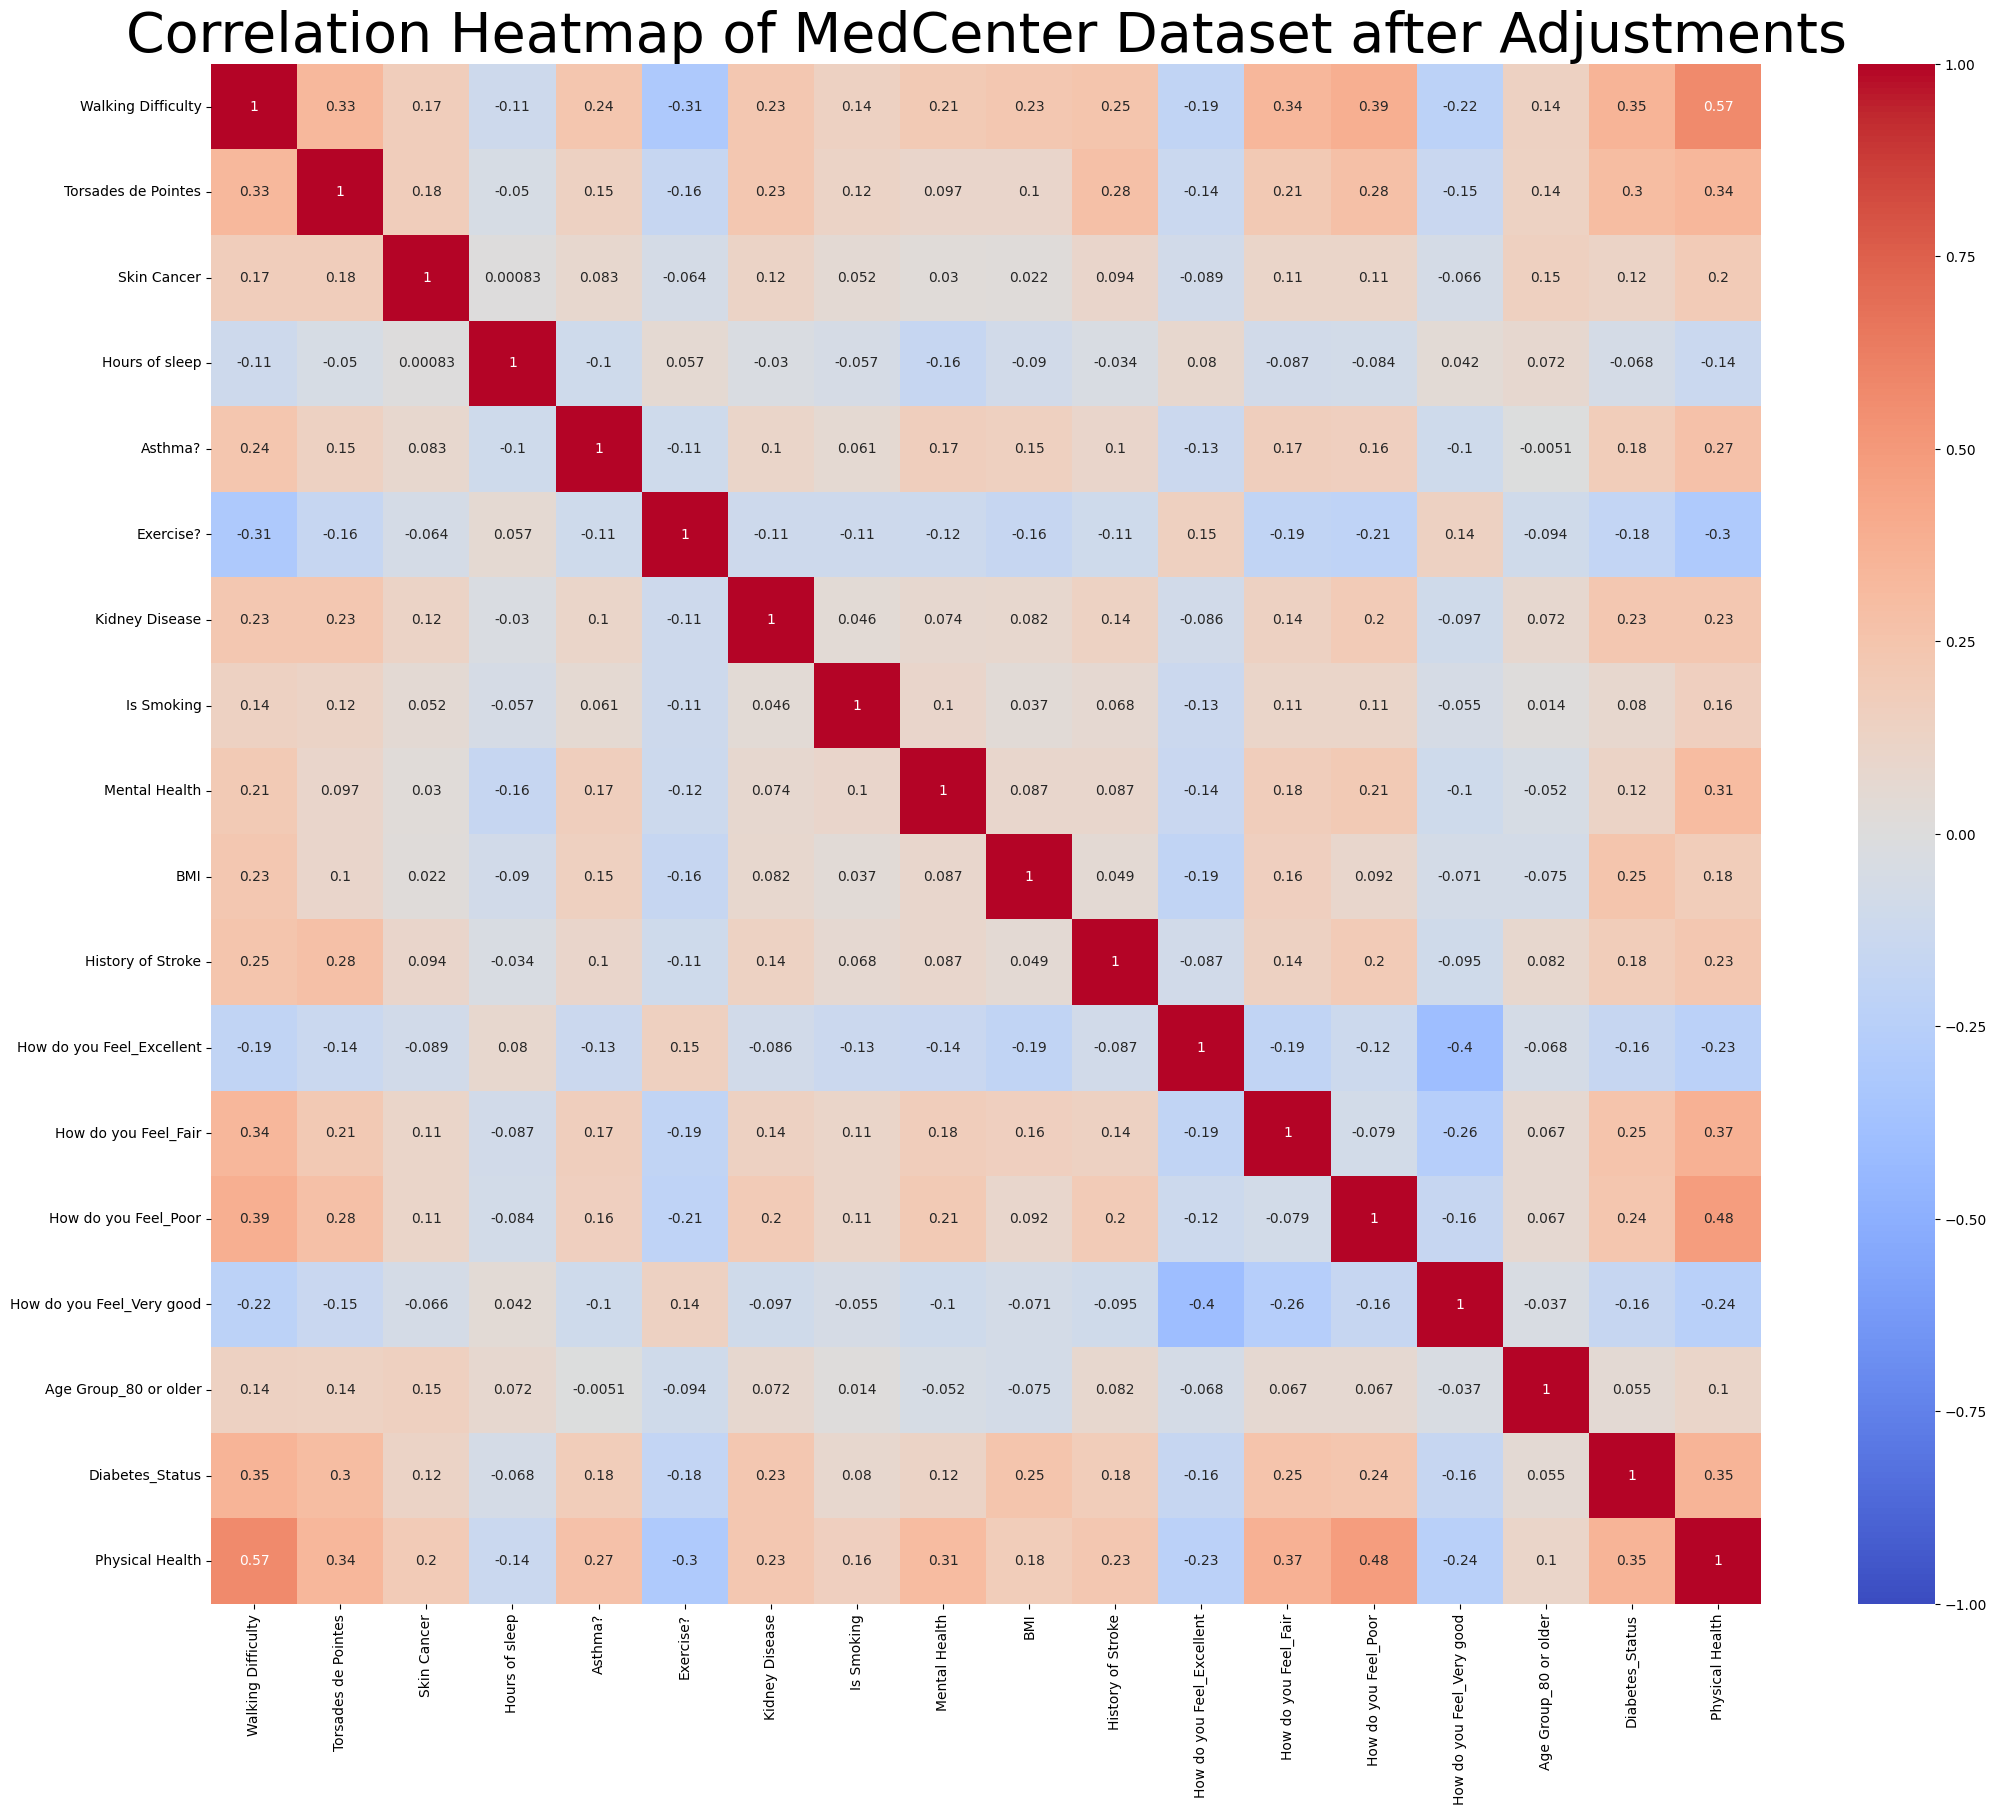

In [ ]:
# Generating the correlation matrix to see data after more adjustments
correlation_matrix = medcenter_df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of MedCenter Dataset after Adjustments", fontsize=40)

plt.show()

After all needed adjustments in data we prepare the splits to train, validate and test future models

In [ ]:


# Sklearn was not imported in the begining, because of its size and easiness of coding this way
from sklearn.model_selection import train_test_split

# Spliting the data into features (X) and target variable (y)
X = medcenter_df.drop('Physical Health', axis=1)  # Features: All columns except 'Physical Health'
y = medcenter_df['Physical Health']  # Target: 'Physical Health' column

# First, spliting into training and temporary test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Now spliting the temporary test set into validation and test sets
# Here we're splitting the temp set into half, so the final proportion will be 80% train, 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 NOTES FROM THE SECTION
 1. After first adjustements we saw little correlations overall, only a few more important features
 2. More adjustemets were needed to delete low correlation features
 3. Illogical entries and outliers were deleted, data was normalised
 4. We chose a bundle of features with correlation > 0.1, becuase after many fittings this gave us the highest R2 score and MSE

## Training
Choosing adequate models to perform the task and training them on cleaned dataset

In [ ]:
## First we begin to test the simplest model for this type of problem: Linear Regression. We chose Mean Square Error and R2 score as evaluation factors.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating the model
lr_model = LinearRegression()

# Training the model
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_val)

# Evaluating the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.04592687854689538
R^2 Score: 0.5062613778428533


This shows us that the R2 score isn't as significant as we want, MSE stands firm at a low level

In [ ]:
## We choose 3 models for further work, because of their significantly different nature of mathematical operations. First checking their outcomes on default hyperparameters.

from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor

# Defining models
gb_model = GradientBoostingRegressor()
nn_model = MLPRegressor(max_iter=1000)

# Defining the Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('lr', lr_model),
        ('gb', gb_model),
        ('nn', nn_model)
    ],
    final_estimator=lr_model  # Using Linear Regression as the final estimator
)

# Dictionary for models
models = {
    "Linear Regression": lr_model,
    "Gradient Boosting": gb_model,
    "Neural Network": nn_model,
    "Stacking Regressor": stacking_model
}

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    return mse, r2

# Training, testing, and printing scores for each model
for name, model in models.items():
    mse, r2 = train_and_evaluate(model, X_train, y_train, X_val, y_val)
    print(f"{name} - MSE: {mse:.3f}, R² Score: {r2:.3f}")


Linear Regression - MSE: 0.046, R² Score: 0.506
Gradient Boosting - MSE: 0.043, R² Score: 0.533
Neural Network - MSE: 0.043, R² Score: 0.532
Stacking Regressor - MSE: 0.043, R² Score: 0.536


With default hyperparameters we have slightly better outcomes from more complex methods, with Stacking Regressor as the best one, not by far

In [ ]:
## Now we find hyperparameters for all possible models

from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Defining cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# Hyperparameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}

# Hyperparameter tuning for Neural Network using Randomized Search
param_dist_nn = {
    'hidden_layer_sizes': [(50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}
random_search_nn = RandomizedSearchCV(nn_model, param_dist_nn, n_iter=10, cv=kf, scoring='neg_mean_squared_error')
random_search_nn.fit(X_train, y_train)

# Grid Search for Gradient Boosting
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Using the best parameters from the Grid Searches for the base models
tuned_gb_model = GradientBoostingRegressor(**grid_search_gb.best_params_)
tuned_nn_model = MLPRegressor(**random_search_nn.best_params_)

# Defining the Stacking Regressor with the tuned base models
stacking_model = StackingRegressor(
    estimators=[
        ('gb', tuned_gb_model),
        ('nn', tuned_nn_model),
        ('lr', lr_model)
    ],
    final_estimator=lr_model
)

# Defining hyperparameter grid for the Stacking Regressor's final estimator
param_grid_stack_final = {
    'final_estimator__fit_intercept': [True, False],
    'final_estimator__positive': [True, False]
}

# Grid Search for Stacking Regressor's final estimator
grid_search_stack_final = GridSearchCV(stacking_model, param_grid_stack_final, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_stack_final.fit(X_train, y_train)


# Printing the best parameters
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best parameters for Neural Network:", random_search_nn.best_params_)
print("Best parameters for Stacking Regressor's final estimator:", grid_search_stack_final.best_params_)


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best parameters for Neural Network: {'hidden_layer_sizes': (50, 50), 'alpha': 0.01, 'activation': 'relu'}
Best parameters for Stacking Regressor's final estimator: {'final_estimator__fit_intercept': False, 'final_estimator__positive': False}


Above we have the best parameters for all the methods

In [ ]:
# Defining the base models with their best parameters
gb_model_best = GradientBoostingRegressor(**grid_search_gb.best_params_)
nn_model_best = MLPRegressor(**random_search_nn.best_params_)

# Defining the Stacking Regressor with the tuned base models
best_stacking = StackingRegressor(
    estimators=[
        ('gb', gb_model_best),
        ('nn', nn_model_best),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()  # Using the tuned parameters for the final estimator
)

# Retraining Neural Network
best_nn = MLPRegressor(**random_search_nn.best_params_)
best_nn.fit(X_train, y_train)

# Retraining Gradient Boosting
best_gb = GradientBoostingRegressor(**grid_search_gb.best_params_)
best_gb.fit(X_train, y_train)

# Retraining the Stacking Regressor on the training data
best_stacking.fit(X_train, y_train)

StackingRegressor(estimators=[('gb', GradientBoostingRegressor(max_depth=5)),
                              ('nn',
                               MLPRegressor(alpha=0.01,
                                            hidden_layer_sizes=(50, 50))),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression())

After fitting the best parameters we begin to retrain the model.

## Results
Lookig at the performance of the best model on test data

In [ ]:
# Function to evaluate a model
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    return r2, mse

# Evaluating Gradient Boosting
gb_r2, gb_mse = evaluate_model(best_gb, X_val, y_val)

# Evaluating Neural Network
nn_r2, nn_mse = evaluate_model(best_nn, X_val, y_val)

# Evaluating Stacking
stacking_r2, stacking_mse = evaluate_model(best_stacking, X_val, y_val)

# Printing the evaluation results
print(f"Gradient Boosting - R²: {gb_r2:.3f}, MSE: {gb_mse:.3f}")
print(f"Stacking Regressor - R²: {stacking_r2:.3f}, MSE: {stacking_mse:.3f}")
print(f"Neural Network - R²: {nn_r2:.3f}, MSE: {nn_mse:.3f}")


Gradient Boosting - R²: 0.538, MSE: 0.043
Stacking Regressor - R²: 0.538, MSE: 0.043
Neural Network - R²: 0.530, MSE: 0.044


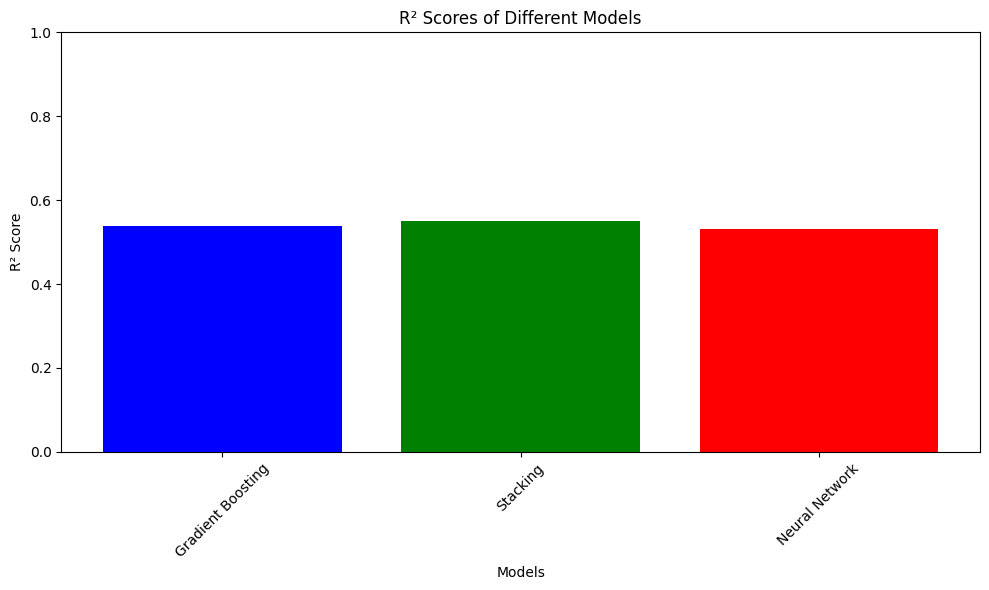

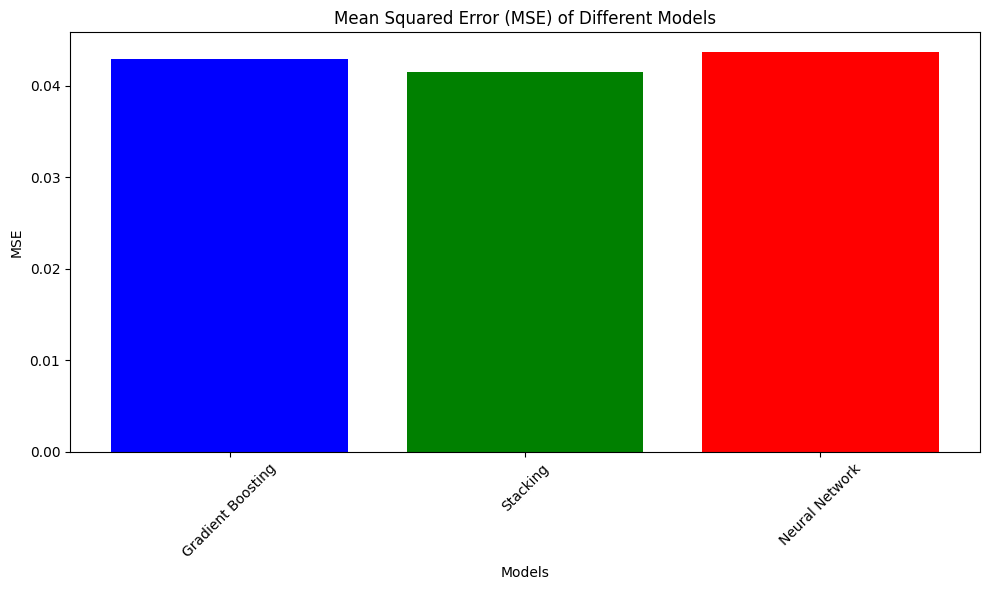

In [ ]:
# Evaluation results
r2_scores = [gb_r2, stacking_r2, nn_r2]
mse_scores = [gb_mse, stacking_mse, nn_mse]
models = ['Gradient Boosting', 'Stacking', 'Neural Network']

# Plotting R² scores
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.title('R² Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0.5, 1)  # Set y-axis limit for R² score (0 to 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting MSE scores
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

On validation set we see similar results, still with Stacking Regressor as the best

In [ ]:
# Testing the best method - Stacking
stacking_r2, stacking_mse = evaluate_model(best_stacking, X_test, y_test)

print(f"Best model: Stacking Regressor - R²: {stacking_r2}, MSE: {stacking_mse}")

Best model: Stacking Regressor - R²: 0.5513687107250954, MSE: 0.04152020180098682


The testing of the best method revealed R2 of 0.551 and MSE 0.041 which is the best outcome overall in the whole proccess.